# Assignment is at the bottom! 

In [9]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from pylab import rcParams
rcParams['figure.figsize'] = 10, 5


from sklearn.linear_model import LogisticRegression as Model

In [2]:
## Fake dataset designed to highlight concepts
y = np.concatenate([np.zeros(10), np.ones(10)])    # 10 values that are 0, 10 values that are 1
x = np.linspace(0, 10, len(y))

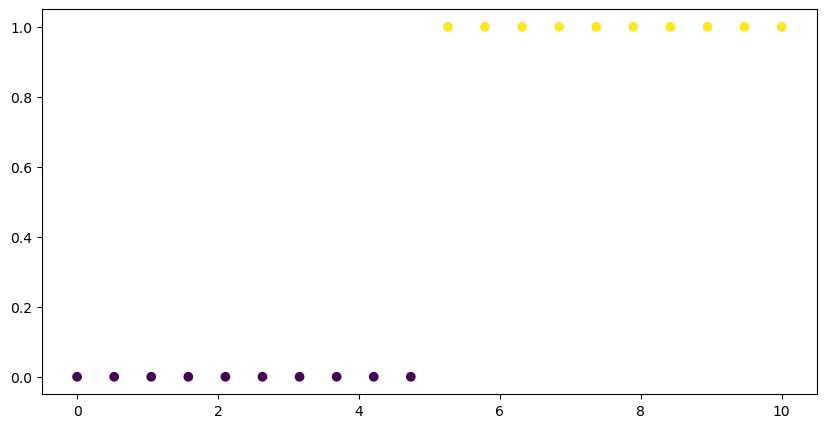

In [10]:
plt.scatter(x, y, c=y)

In [5]:
# Instantiate a model
model = LogisticRegression()

In [6]:
# Fit the model to the data
model.fit(x.reshape(-1, 1),y)

LogisticRegression()

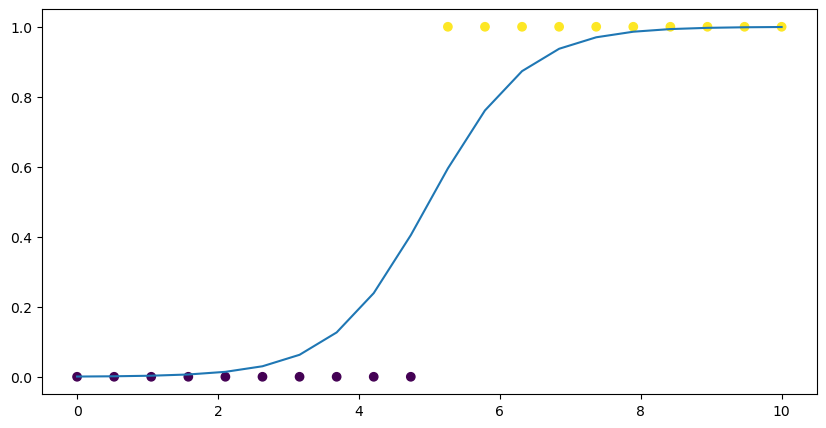

In [13]:
# Plot the values again
plt.scatter(x,y, c=y)
# Plot a prediction curve.
# NOTE: This will plot both probabiliyt of 1 and probability of 0.
# By including the [:,1] at the end, we just get probability of 1.
plt.plot(x, model.predict_proba(x.reshape(-1, 1))[:,1])

In [14]:
# model returns a coeficient and intercept
b, b0 = model.coef_, model.intercept_    # Assign to B and B0 (Beta and Beta0)
model.coef_, model.intercept_

(array([[1.46709085]]), array([-7.33542562]))

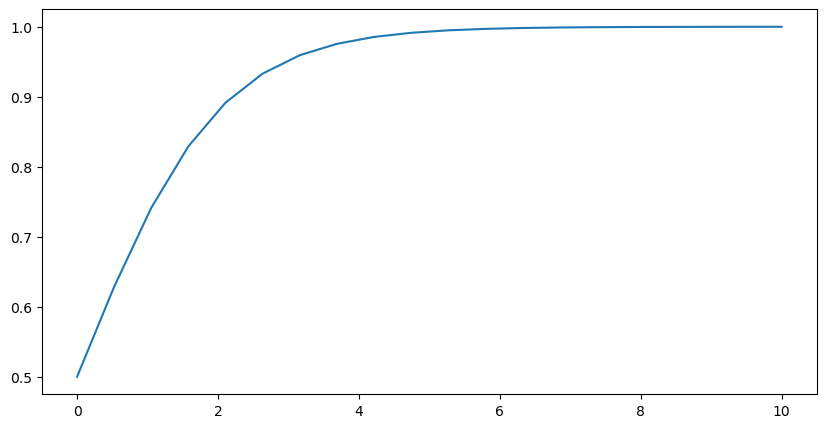

In [15]:
# This is the equation from our theory section
plt.plot(x, 1/(1+np.exp(-x)))

We can use our coeficient that we got from the model, and write out the entire equation to get he full curve.

In [16]:
b

array([[1.46709085]])

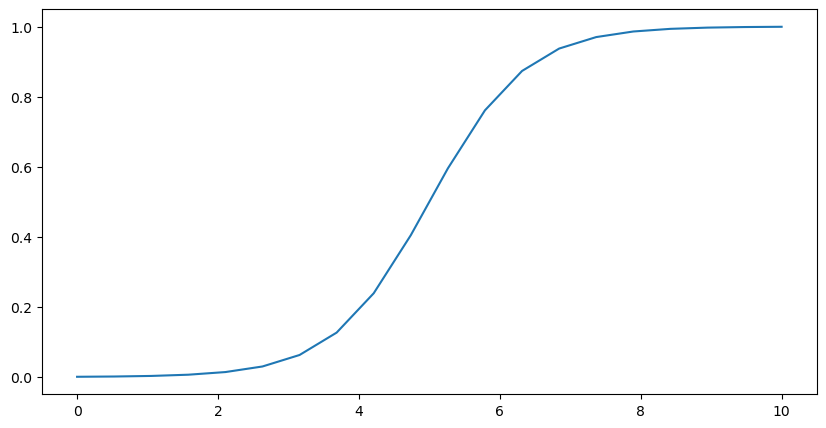

In [18]:
plt.plot(x, 1/(1+np.exp(-(b[0]*x +b0))))

What if we have multiple coeficients? We can plot those resutls as well.

In [21]:
# Note the new library for 3d charts
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

<Figure size 1000x500 with 0 Axes>

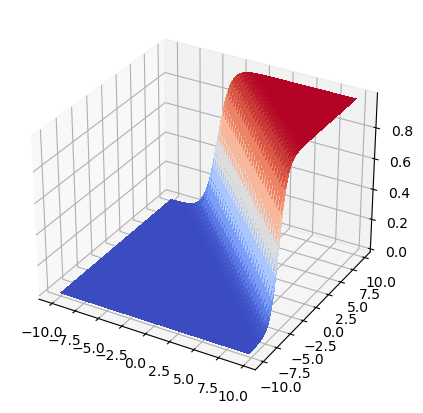

In [28]:
# This is simply visualizing it
fig = plt.figure()
#ax = fig.gca(projection='3d')
ax = fig.add_subplot(111, projection='3d')

# Make data.
X = np.arange(-10, 10, 0.25)
Y = np.arange(-10, 10, 0.25)

# The meshgrid creates matrices out of the original data to plot.
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = 1/(1+np.exp(-(b[0]*X +b[0]*Y +b0)))     # Put multipliers ont he coeficients to change slope.
                                            # Add values to intercept (b0) to shift midpoint.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)


In [12]:
# Note the results of the meshgrid: the repeated columns of -10, -9.75, -9.5, etc.
X

array([[-10.  ,  -9.75,  -9.5 , ...,   9.25,   9.5 ,   9.75],
       [-10.  ,  -9.75,  -9.5 , ...,   9.25,   9.5 ,   9.75],
       [-10.  ,  -9.75,  -9.5 , ...,   9.25,   9.5 ,   9.75],
       ...,
       [-10.  ,  -9.75,  -9.5 , ...,   9.25,   9.5 ,   9.75],
       [-10.  ,  -9.75,  -9.5 , ...,   9.25,   9.5 ,   9.75],
       [-10.  ,  -9.75,  -9.5 , ...,   9.25,   9.5 ,   9.75]])

In [13]:
# And for Y, the values are in rows
Y

array([[-10.  , -10.  , -10.  , ..., -10.  , -10.  , -10.  ],
       [ -9.75,  -9.75,  -9.75, ...,  -9.75,  -9.75,  -9.75],
       [ -9.5 ,  -9.5 ,  -9.5 , ...,  -9.5 ,  -9.5 ,  -9.5 ],
       ...,
       [  9.25,   9.25,   9.25, ...,   9.25,   9.25,   9.25],
       [  9.5 ,   9.5 ,   9.5 , ...,   9.5 ,   9.5 ,   9.5 ],
       [  9.75,   9.75,   9.75, ...,   9.75,   9.75,   9.75]])

### What if the data doesn't really fit this pattern?

In [29]:
# Create data that won't fit the S grid pattern
y = np.concatenate([np.zeros(10), np.ones(10), np.zeros(10)])
x = np.linspace(0, 10, len(y))

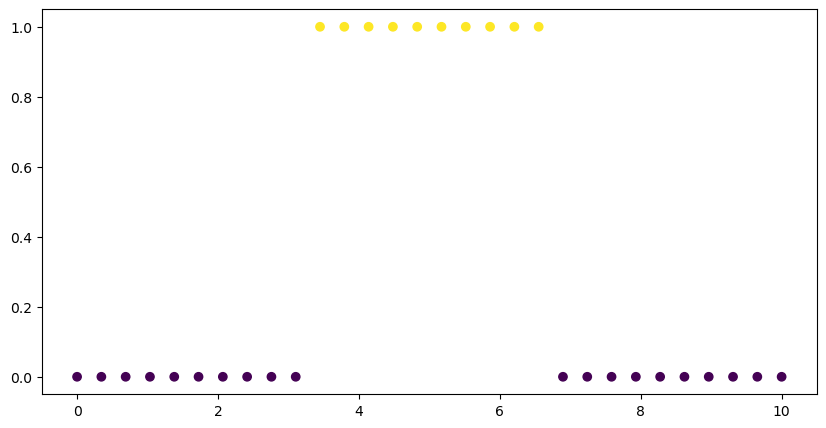

In [30]:
plt.scatter(x,y, c=y)

In [31]:
# Attempt to build the model as before
model.fit(x.reshape(-1, 1),y)

LogisticRegression()

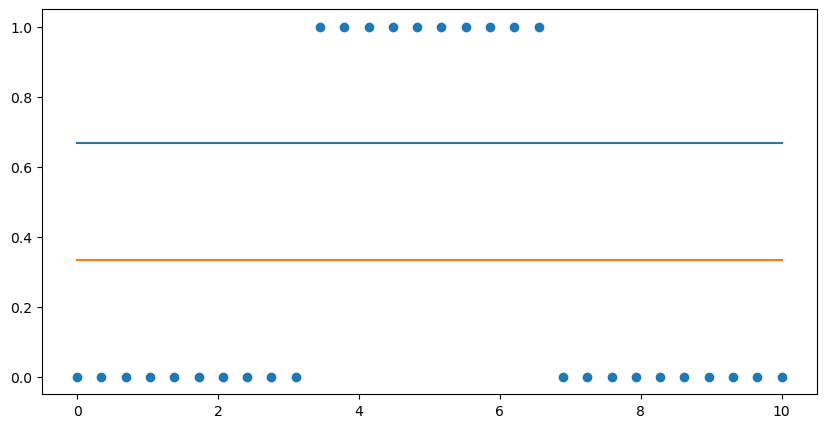

In [32]:
plt.scatter(x,y)
plt.plot(x, model.predict_proba(x.reshape(-1, 1)))

Unfortunately the results show flat lines, not good predictors or probabilities of 1 or 0.
However, we could create two seaprate models to fit the two sides of the data.

In [35]:
# Create a model for the first half of the data!
model1 = LogisticRegression()
model1.fit(x[:15].reshape(-1, 1),y[:15])

LogisticRegression()

In [36]:
# Create a model for the second half of the data!
model2 = LogisticRegression()
model2.fit(x[15:].reshape(-1, 1),y[15:])

LogisticRegression()

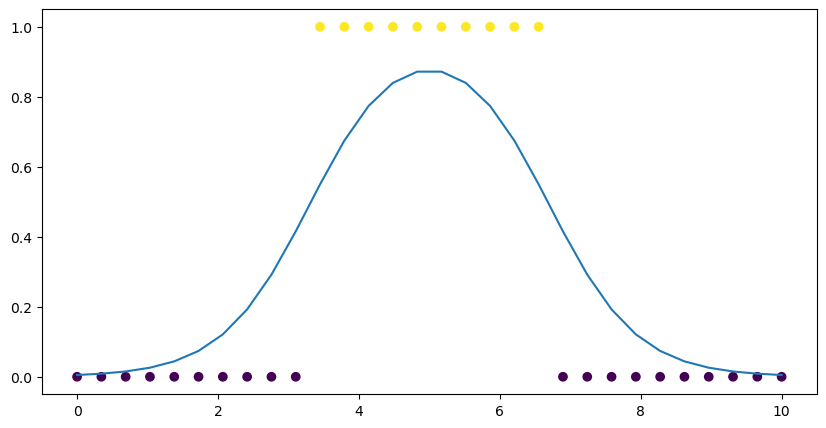

In [37]:
plt.scatter(x,y, c=y)
## MULTIPLY the predictions together to get the complete model
plt.plot(x, model1.predict_proba(x.reshape(-1, 1))[:,1] * model2.predict_proba(x.reshape(-1, 1))[:,1])

### Now let's use some real data!

In [39]:
df = pd.read_csv('../mlnn-main/data/adult.data', index_col=False)
golden = pd.read_csv('../mlnn-main/data/adult.test', index_col=False)

In [40]:
from sklearn import preprocessing

enc = preprocessing.OrdinalEncoder()

In [41]:
transform_columns = ['sex', 'workclass', 'education', 'marital-status', 
                     'occupation', 'relationship', 'race', 'sex', 
                     'native-country', 'salary']

In [42]:
x = df.copy()

# Use the Encoder to transform the non-numeric columns
x[transform_columns] = enc.fit_transform(df[transform_columns])

# There are some anomalies in the golden data
golden['salary'] = golden.salary.replace(' <=50K.', ' <=50K').replace(' >50K.', ' >50K')
xt = golden.copy()

# Use the Encoder to transform the non-numeric columns in the golden data.
xt[transform_columns] = enc.transform(golden[transform_columns])

In [43]:
df.salary.unique()

array([' <=50K', ' >50K'], dtype=object)

In [44]:
golden.salary.replace(' <=50K.', ' <=50K').replace(' >50K.', ' >50K').unique()

array([' <=50K', ' >50K'], dtype=object)

In [45]:
# NOTE: we are scaling the values in the training data set.
# mean = 0, sd = 1
model.fit(preprocessing.scale(x.drop('salary', axis=1)), x.salary)

LogisticRegression()

In [46]:
pred = model.predict(preprocessing.scale(x.drop('salary', axis=1)))
pred_test = model.predict(preprocessing.scale(xt.drop('salary', axis=1)))

In [47]:
x.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,7.0,77516,9.0,13,4.0,1.0,1.0,4.0,1.0,2174,0,40,39.0,0.0
1,50,6.0,83311,9.0,13,2.0,4.0,0.0,4.0,1.0,0,0,13,39.0,0.0
2,38,4.0,215646,11.0,9,0.0,6.0,1.0,4.0,1.0,0,0,40,39.0,0.0
3,53,4.0,234721,1.0,7,2.0,6.0,0.0,2.0,1.0,0,0,40,39.0,0.0
4,28,4.0,338409,9.0,13,2.0,10.0,5.0,2.0,0.0,0,0,40,5.0,0.0


In [48]:
from sklearn.metrics import (
    accuracy_score, 
    classification_report, 
    confusion_matrix, auc, roc_curve
)

In [49]:
accuracy_score(x.salary, pred)

0.8250360861152913

In [50]:
confusion_matrix(x.salary, pred)

array([[23300,  1420],
       [ 4277,  3564]], dtype=int64)

In [51]:
print(classification_report(x.salary, pred))

              precision    recall  f1-score   support

         0.0       0.84      0.94      0.89     24720
         1.0       0.72      0.45      0.56      7841

    accuracy                           0.83     32561
   macro avg       0.78      0.70      0.72     32561
weighted avg       0.81      0.83      0.81     32561



In [52]:
print(classification_report(xt.salary, pred_test))

              precision    recall  f1-score   support

         0.0       0.85      0.94      0.89     12435
         1.0       0.70      0.45      0.55      3846

    accuracy                           0.82     16281
   macro avg       0.77      0.69      0.72     16281
weighted avg       0.81      0.82      0.81     16281



# Assignment 

## 1. Use your own dataset (`Heart.csv` is acceptable), create a train and a test set,  and build 2 models: Logistic Regression and Decision Tree (__shallow__). Compare the test results using `classification_report` and `confusion_matrix`. Explain which algorithm is optimal
## 2. Repeat 1. but let the Decision Tree be much deeper to allow over-fitting. Compare the two models' test results again, and explain which is optimal

Goal for part 2 is to see if we can get the DecisionTree to overfit.

## Part 1
The dataset I have chosen is the apple-quality data found on Kaggle: https://www.kaggle.com/datasets/nelgiriyewithana/apple-quality. The data set tracks 7 numerical attributes related to apples and classifies them as either Good or Bad.

In [1]:
# Import libraries
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Import some scoring metrics
from sklearn.metrics import (accuracy_score, 
                             classification_report, 
                             confusion_matrix, auc, roc_curve
                            )

In [2]:
# Load the dataset
apples = pd.read_csv('apple_quality.csv')
# Drop the unneeded ID
apples = apples.drop(['A_id'], axis = 1)

# Check the number of good and bad apples
apples.Quality.value_counts()

Quality
good    2004
bad     1996
Name: count, dtype: int64

In [3]:
# Convert the Quality field to 1 for good and 0 for bad.
apples['Quality'] = np.where(apples['Quality'] == 'good', 1, 0)

# Check the number of 1s and 0s - this shoudl align to good and bad above
apples.Quality.value_counts()

Quality
1    2004
0    1996
Name: count, dtype: int64

In [4]:
# Split the data set into training and testing data sets
x_train, x_test, y_train, y_test = train_test_split(apples.drop(['Quality'], axis=1), apples.Quality, test_size=0.25, random_state=0)

#### Logistic Regression model

In [5]:
# Fit a Logistic Regression model
logmodel = LogisticRegression()
logmodel.fit(x_train, y_train)

LogisticRegression()

In [6]:
# Predict values based on the test data
pred_log = logmodel.predict(x_test)

# Check accuracy
logacc = accuracy_score(y_test, pred_log)
logacc

0.727

#### Decision Tree model

In [7]:
# Create a Decision Tree with a shallow max_depth
treemodel = DecisionTreeClassifier(criterion='entropy', max_depth=3)

# Fit the training data to the model.
treemodel.fit(x_train, y_train)

# How many nodes did we get?
treemodel.tree_.node_count

15

In [8]:
# Make some predictions with the test data set
pred_tree = treemodel.predict(x_test)

# Check accuracy
treeacc = accuracy_score(y_test, pred_tree)
treeacc

0.662

#### Comparison

In [9]:
# Get confusion matrices
log_matrix = confusion_matrix(y_test, pred_log)
tree_matrix = confusion_matrix(y_test, pred_tree)

log_matrix, tree_matrix

(array([[360, 146],
        [127, 367]], dtype=int64),
 array([[270, 236],
        [102, 392]], dtype=int64))

In [10]:
results = {
    "True 0": [log_matrix[0, 0], tree_matrix[0, 0]],
    "False 0": [log_matrix[0, 1], tree_matrix[0, 1]],
    "False 1": [log_matrix[1, 0], tree_matrix[1, 0]],
    "True 1:": [log_matrix[1, 1], tree_matrix[1, 1]]
}
pd.DataFrame(results, index = ["Logistic Regression", "Decision Tree"])

,True 0,False 0,False 1,True 1:
Logistic Regression,360,146,127,367
Decision Tree,270,236,102,392


In this case, the Logistic Regression model did much better predicting the 0s (bad apples), beating the Decision Tree by 90. However, the Decision Tree did a better job of predicting the 1s (good apples), with a difference of 25. Assessing the better model will come down to the Precision, Recall, and F1-score.

In [11]:
# Generate Classification Reports
report_log = classification_report(y_test, pred_log)
report_tree = classification_report(y_test, pred_tree)

Logisitic Regression:

In [12]:
print(report_log)

              precision    recall  f1-score   support

           0       0.74      0.71      0.73       506
           1       0.72      0.74      0.73       494

    accuracy                           0.73      1000
   macro avg       0.73      0.73      0.73      1000
weighted avg       0.73      0.73      0.73      1000



Decision Tree

In [13]:
print(report_tree)

              precision    recall  f1-score   support

           0       0.73      0.53      0.62       506
           1       0.62      0.79      0.70       494

    accuracy                           0.66      1000
   macro avg       0.68      0.66      0.66      1000
weighted avg       0.68      0.66      0.66      1000



The _Precision_ and _Recall_ match the Confusion Matrices, in that the Logistic Regression shows better results for hte 0 values, while the Decision Tree is better fo rthe 1 values. However, the _F1-score_ clearly favors the Logisitc Regression model, indicating it provides a better overall result.

## Part 2
This time we will repeat the Decision Tree with a __max_depth = 10__ in an effort to overfit the model.

In [14]:
# Create a Decision Tree with a deeper max_depth
treemodel10 = DecisionTreeClassifier(criterion='entropy', max_depth=10)

# Fit the training data to the model.
treemodel10.fit(x_train, y_train)

# How many nodes did we get?
treemodel10.tree_.node_count

327

In [15]:
# Make some predictions with the test data set
pred_tree10 = treemodel10.predict(x_test)

# Check accuracy
treeacc10 = accuracy_score(y_test, pred_log)
treeacc10

0.727

#### Overfitting
We can determine to what extent the model is overfitted by making a prediction against the training data.

In [16]:
# Make some predictions with the test data set
pred = treemodel10.predict(x_train)

# Check accuracy
accuracy_score(y_train, pred)


0.9143333333333333

With 92% accuracy, we can assume this model matches the training data and is likely overfitted.

#### Comparison to Logistic Regression
Now we will do the same comparisons as in __Part 1__, but with the deeper Decision Tree.

In [17]:
# Get confusion matrices
tree_matrix10 = confusion_matrix(y_test, pred_tree10)

log_matrix, tree_matrix10

(array([[360, 146],
        [127, 367]], dtype=int64),
 array([[398, 108],
        [129, 365]], dtype=int64))

In [18]:
results = {
    "True 0": [log_matrix[0, 0], tree_matrix10[0, 0]],
    "False 0": [log_matrix[0, 1], tree_matrix10[0, 1]],
    "False 1": [log_matrix[1, 0], tree_matrix10[1, 0]],
    "True 1:": [log_matrix[1, 1], tree_matrix10[1, 1]]
}
pd.DataFrame(results, index = ["Logistic Regression", "Decision Tree (Deep)"])

,True 0,False 0,False 1,True 1:
Logistic Regression,360,146,127,367
Decision Tree (Deep),398,108,129,365


In this case, we can see that the Decision Tree outperformed the Logixtic Regression model in predicting 0s (bad apples) and essentially matched it with prediting 1 values (good apples). THis is a changle from our shallow Decision Tree which had substantially less success with predicting 0 values than the Logisitic Regression.

Finally, we produce a classification report for the new Decision Tree and compare it to our Logisitic Regression report from earlier.

In [19]:
# Generate Classification Report for the Deep Decision Tree
report_tree10 = classification_report(y_test, pred_tree10)

#### Logistic Regression

In [20]:
# Print the report generated in Part 1
print(report_log)

              precision    recall  f1-score   support

           0       0.74      0.71      0.73       506
           1       0.72      0.74      0.73       494

    accuracy                           0.73      1000
   macro avg       0.73      0.73      0.73      1000
weighted avg       0.73      0.73      0.73      1000



#### Decision Tree with Depth of 10

In [22]:
# Print the report for the new Deep Decision Tree
print(report_tree10)

              precision    recall  f1-score   support

           0       0.76      0.79      0.77       506
           1       0.77      0.74      0.75       494

    accuracy                           0.76      1000
   macro avg       0.76      0.76      0.76      1000
weighted avg       0.76      0.76      0.76      1000



Our Deep Decision Tree demonstrates a slight edge over the Logistic Regression model across all scores for __Precision__, __Recall__, and __F1-Scores__. The only exception here is the Recall value for 1 values, which matches the Logisitic Regression. Based on these results, the advantage is to the Decision Tree with the deeper __max-depth__ compared to the Part 1 section where the Logistic Regression produced better results.